# Gradient Decent

In this notebook you can see how the three variants of Gradient Descent (Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent) can be implemented in Python. 
Remember the iterative steps of Gradient Descent to better understand the code.
It might also help you to understand the influence of the hyperparameters of Gradient Descent by trying to modify some of them here.

**Task:**

Read through the notebook and try to understand what happens at each step. As you can see proper comments describing the code are missing. Add them wherever its necessary (or helpful for you to understand the code). 

# Gradient Descent with Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

With `plt.style.use` you can set layouts (background color, gird, etc.) for the whole notebook. In this notebook we will use the ggplot layout. But there are more ([click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)).

In [2]:
plt.style.use(['ggplot'])

We want to use gradient descent to find optimal parameters for a linear regression problem. Here we will create our own data so that we know what the values of the parameters should be for a perfect fit.


$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$  


## Create Data

<h5> Generate some data with:

$$ \beta_{0} = 4 $$ 

$$ \beta_{1} = 3 $$

We'll also add some Gaussian noise to the data.

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
print("X dimensions: ", X.shape)
print("y dimensions: ", y.shape)

X dimensions:  (100, 1)
y dimensions:  (100, 1)


Let's plot our data to check the relation between X and Y

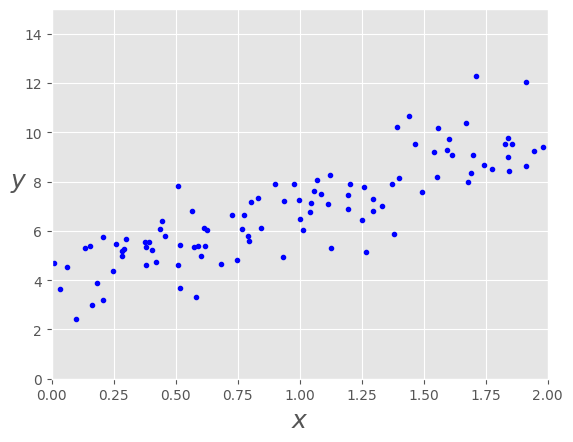

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15]);

The above plot depict a bunch of scattered data points (with blue color)  in which showes more or less a linear trend with positive correlation between x and y. the data points along the vertical axis lyies between slightly above 2 to slightly above 12 and along horizontal axis between 0 and 2. However the linear trend is quite noisy.

##  Analytical way of Linear Regression

Remember that there is a closed formula to find the best parameters for linear regression, called the **Normal-Equation**:


$$ b = (X^TX)^{-1}X^Ty $$

*Remember:* [How to multiply matrices](https://www.mathsisfun.com/algebra/matrix-multiplying.html) 


In [5]:
# np.c_ can be used to concatenate arrays
X_b = np.c_[np.ones((100,1)), X]
print("X_b dimensions: ", X_b.shape)

# Here we implement the formula above with numpy .T for transpose and .dot for the dot product
b_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(b_best)

X_b dimensions:  (100, 2)
[[3.89128439]
 [3.04649744]]


This is close to our real parameters 4 and 3. It cannot be accurate due to the noise we have added to the data.

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(b_best)
y_predict

array([[3.89128439],
       [9.98427927]])

Let's plot a prediction line with the calculated parameters.

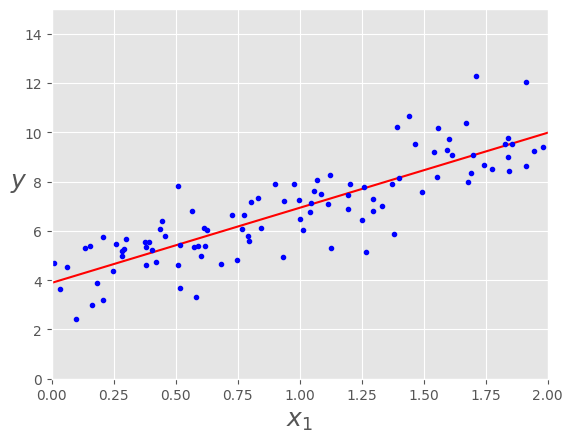

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15]);

Similar to the former plot it depict a bunch of scattered data points (with blue color) in which showes more or less a linear trend with positive correlation between x and y. the data points along the vertical axis lyies between slightly above 2 to slightly above 12 and along horizontal axis between 0 and 2. However the linear trend is quite noisy.
in addition there is predicted line (in red color) which starts at x = 0 and y = 3.89 and ends at x = 2 and y = 10.8


## Gradient Descent

Now, let's use gradient descent to find the optimal parameters.

### Cost Function & Gradients

The general equations for calculating the cost function and gradients for linear regression are shown below. 

**Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions.**



**Cost**

$$J(b) = \frac{ 1 }{ 2n } \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

**Gradient**

$$ \frac{\partial J(b)}{\partial b_j} = \frac{ 1 }{ n }\sum_{i=1}^{n}(\hat{y}_i - y_i) x_{i,j} $$


**Updating the parameters with the gradients**

$$ b_0: = b_0 -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i) * 1) $$

$$ b_1: = b_1 -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i)  x_{i,1})$$


$$ b_2: = b_2 -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i) x_{i,2})$$



$$ b_j: = b_j -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i) x_{i,j})$$


Next, the three variants of the gradient descent method are applied: **batch gradient descent**, **stochastic gradient decent** and **mini-batch gradient descent**. Remind yourself which steps are iteratively repeated in the gradient descent procedure.

## Batch Gradient Descent

Batch gradient descent, computes the gradient of the cost function with respect to the parameters $ b $ for the entire training dataset:

$$ b = b - \alpha \frac{\partial}{\partial b} J(b) $$

As we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory. Batch gradient descent also doesn't allow us to update our model online, i.e. with new examples on-the-fly.

We then update our parameters in the opposite direction of the gradients with the learning rate determining how big of an update we perform. Batch gradient descent is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.

In [8]:
def  cal_cost(b, X, y):
    '''
    Calculates the cost for given X and y. The following shows and example of a single dimensional X
    b = Vector of parameters 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the # of features
    '''
    
    n = len(y)
    
    predictions = X.dot(b)
    cost = 1/(2*n) * np.sum(np.square(predictions-y))
    return cost

In [9]:
def gradient_descent(X, y, b, learning_rate=0.01, iterations=100):
    '''
    X          = Matrix of X with added bias units
    y          = Vector of y
    b          = Vector of parameters np.random.randn(j,1)
    learning_rate 
    iterations = # of iterations
    
    Returns the final b vector and array of cost history over # of iterations
    '''
    n = len(y)
    cost_history = np.zeros(iterations)
    b_history = np.zeros((iterations,2))
    
    for it in range(iterations):
        
        prediction = np.dot(X,b)
        
        b = b - learning_rate * (1/n) * (X.T.dot((prediction - y)))
        b_history[it,:] = b.T
        cost_history[it]  = cal_cost(b, X, y)
        
    return b, cost_history, b_history

Let's start with 1000 iterations and a learning rate of 0.01. Start with initial parameters from a Gaussian distribution.

In [10]:
lr = 0.01
n_iter = 1000

b = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
b, cost_history, b_history = gradient_descent(X_b, y, b, lr, n_iter)


print('b_0:             {:0.3f},\nb_1:             {:0.3f}'.format(b[0][0], b[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

b_0:             3.542,
b_1:             3.355
Final cost/MSE:  0.567


Let's plot the cost history over iterations:

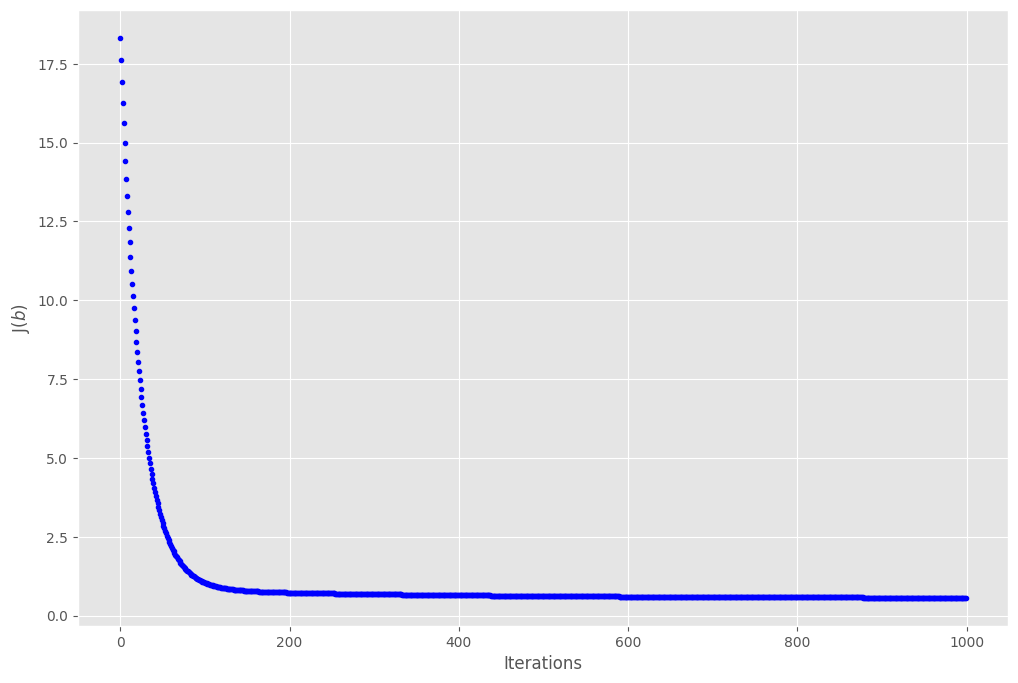

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J$(b)$')
ax.set_xlabel('Iterations')
ax.plot(range(n_iter), cost_history, 'b.');

The above plot depict the cost function J(b) as the vertical axis which ranges between 0 and 18 and iteration as horizontal axisranging between 0 and 1000. There are a bunch of blue dots wich starts at iteration = 0 and J(b) =18 and drops very fast to J(b) with a bit greater than 1 at almost iteration of 100 and continue to be around J(b) = 1 for the rest of iteration till 1000. the data points looks less dense from iteration of 0 to 50 and they look very dense (almost looks like a line than scattered dots) for iteration > 50  

After around 150 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve.

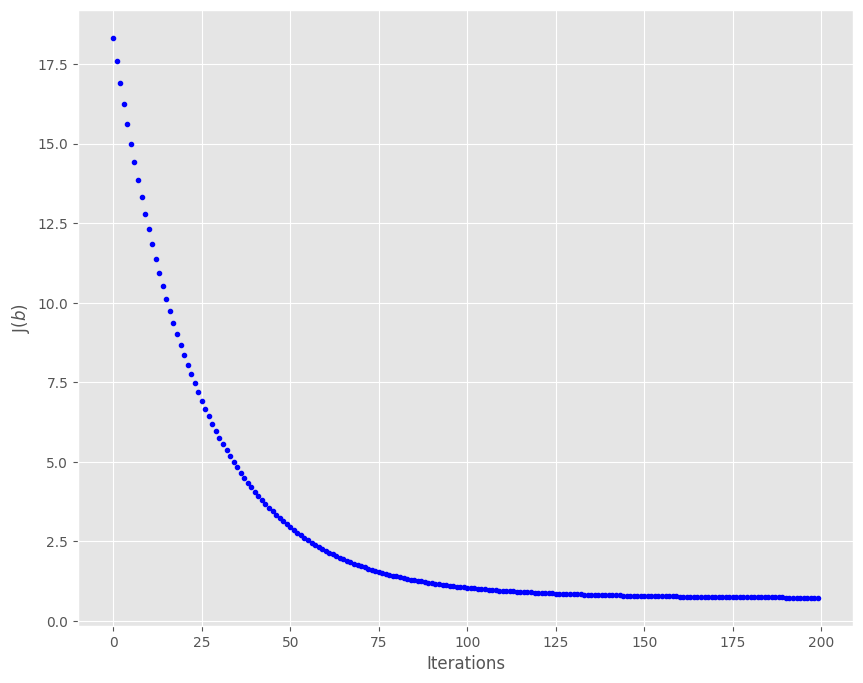

In [12]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J$(b)$')
ax.set_xlabel('Iterations')
ax.plot(range(200), cost_history[:200], 'b.');

The above plot but only zoomed in iteration between 0 and 200

It is worth pointing out that the cost drops faster initially and then the gain in cost reduction is not so great. 

It would be great to see the effect of different learning rates and iterations together. Let us  build a function which can show the effects together and also show how gradient decent is actually working.



In [13]:
def plot_GD(n_iter,lr, ax, ax1=None):
    """
    n_iter = # of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    
    _ = ax.plot(X, y, 'b.')
    b = np.random.randn(2,1)

    tr = 0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(b)
        b, h, _ = gradient_descent(X_b, y, b, lr, 1)
        pred = X_b.dot(b)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X, pred, 'r-', alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        _ = ax1.plot(range(n_iter), cost_history, 'b.')  

Plot the graphs for different iterations and learning rates combinations.

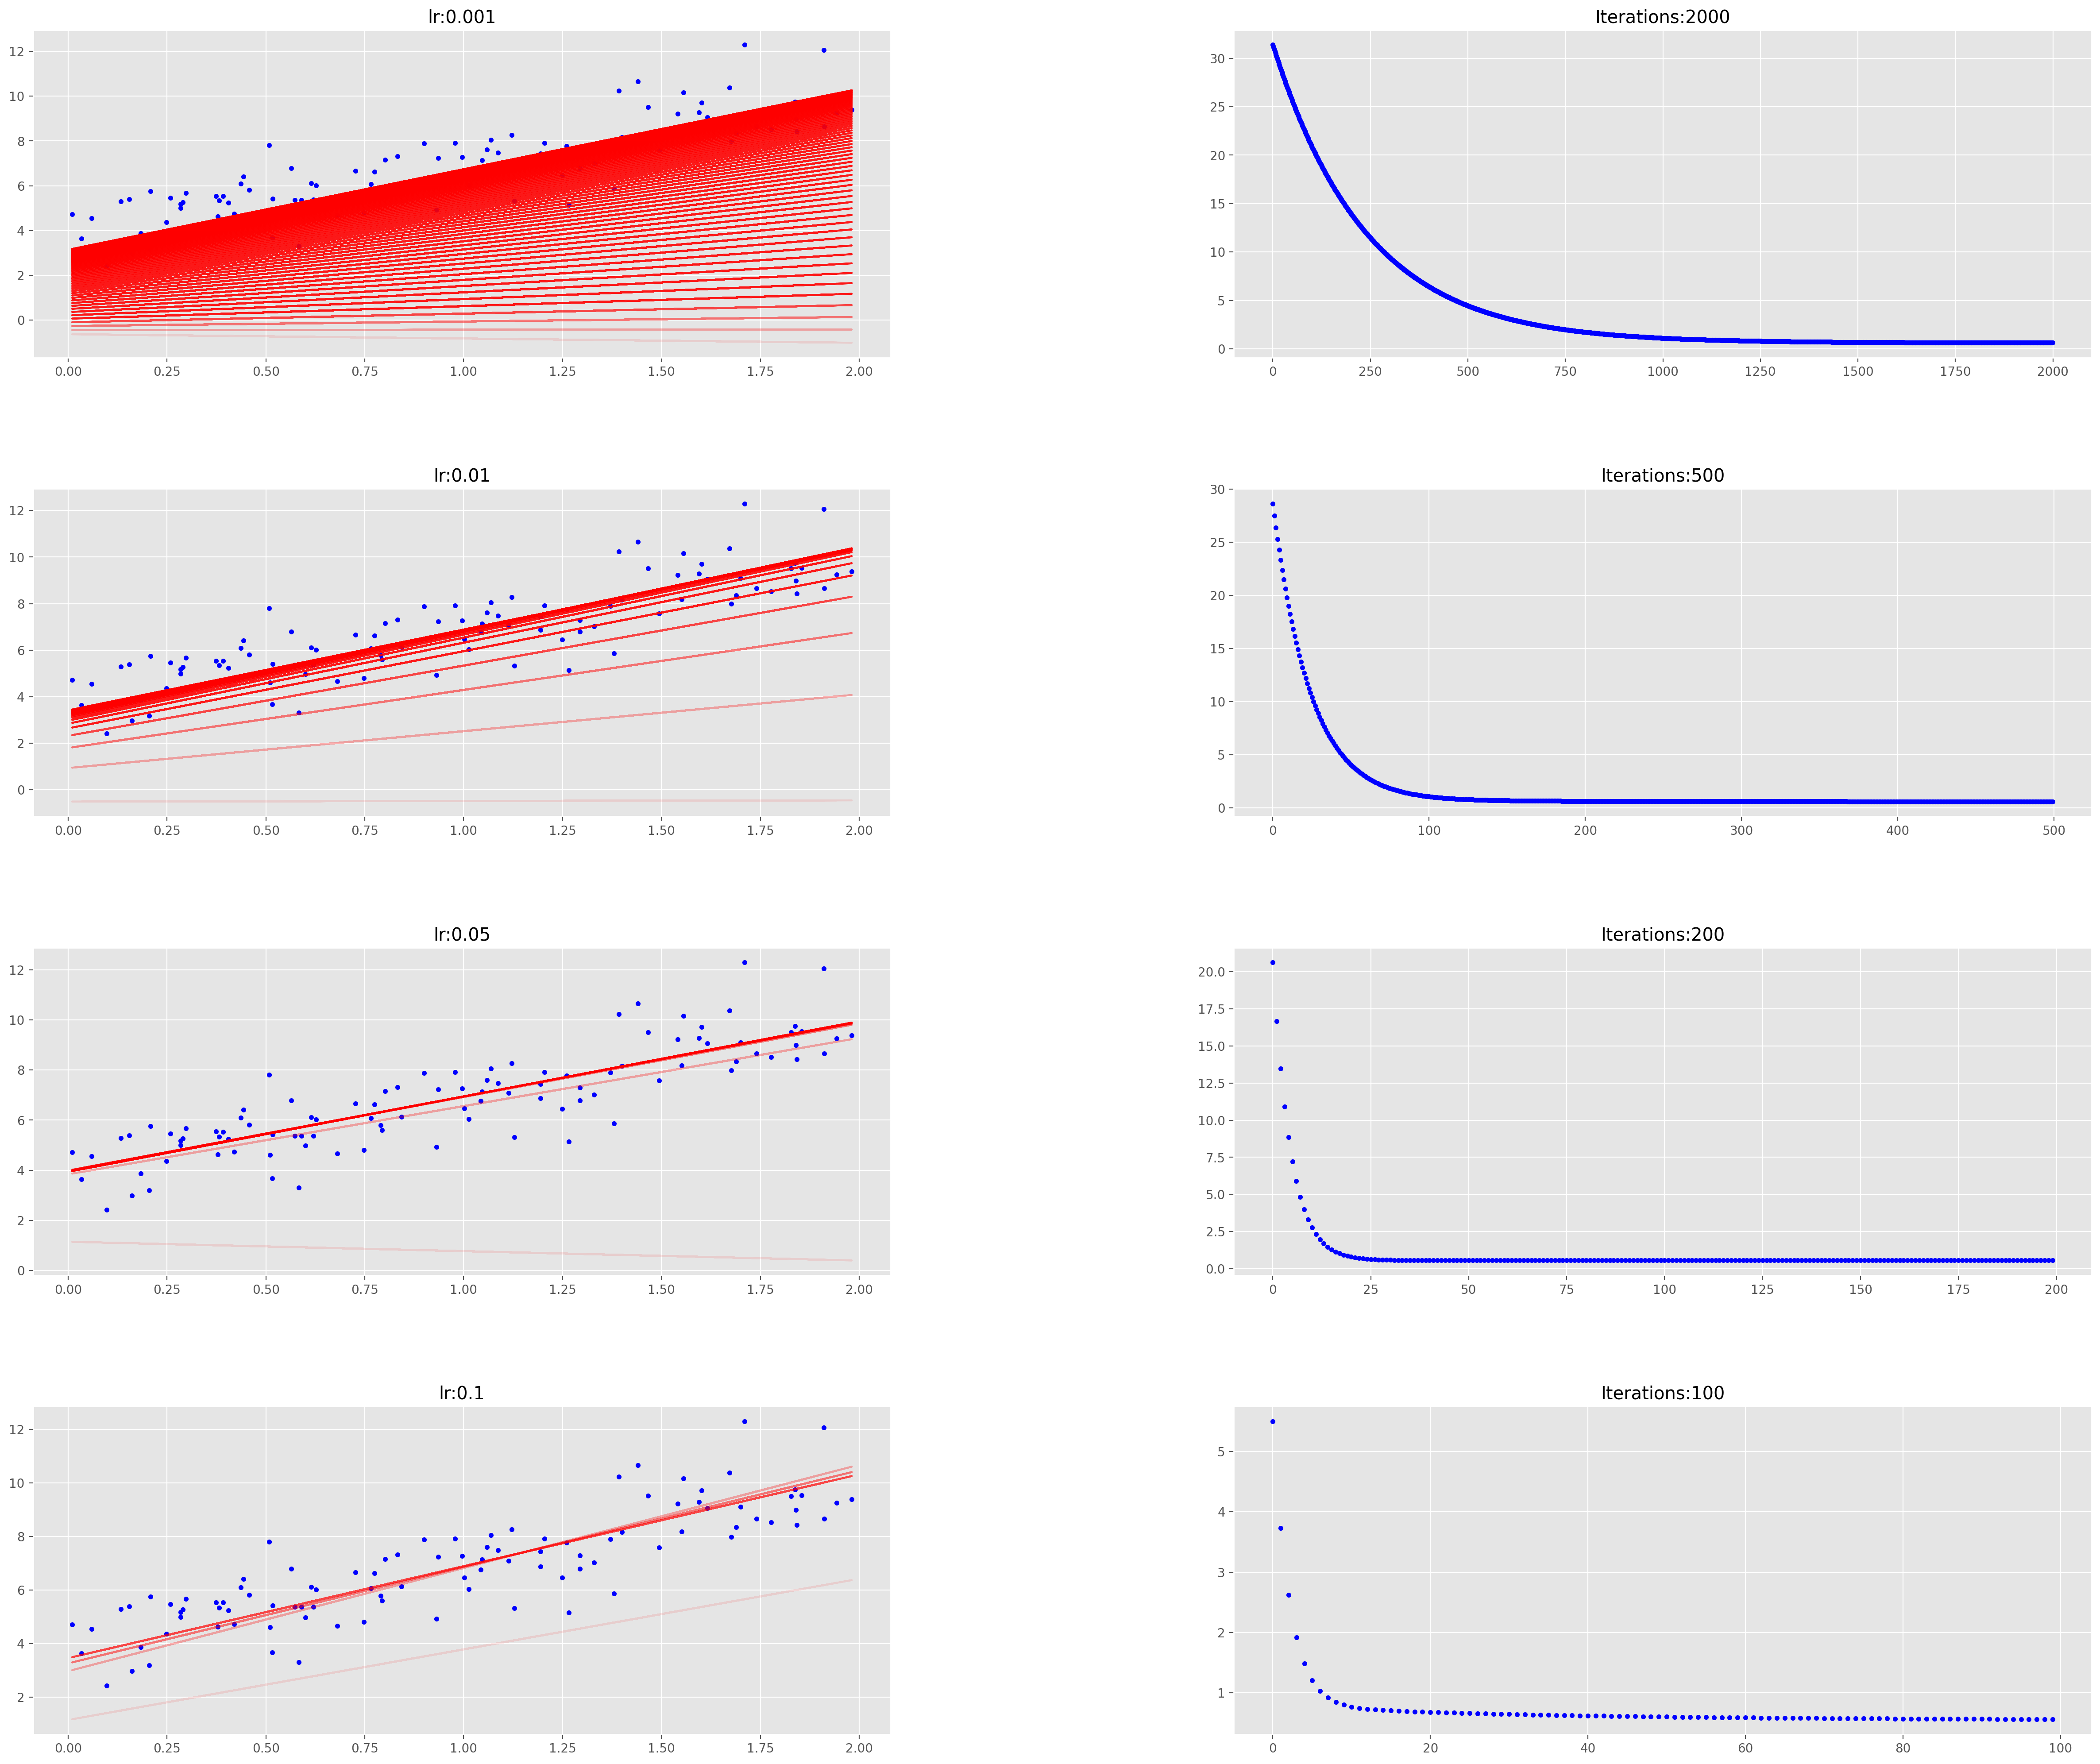

In [14]:
fig = plt.figure(figsize=(30,25), dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr = [(2000,0.001), (500,0.01), (200,0.05), (100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4, 2, count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)

The above depict 8 different plots which the four on the left panel showes the data points in blue and a bunch of lines (in red color) in each one of the plots. the right panel also contains four plots which represent the coresponding cost function versus iteration of the left panle plots.
the first twin plots on top has the learnig rate of 0.001 as plot title in the left plot and the iteration of 2000 as the plot title for the right plot. In the left plot the red lines start as almost horozontal line and start to increae the slope for the next lines till finally the last line is fitted the best on the blue data points and the write plot shows the decay form of the cost function as already mentioned in cost function plot. the elbow of the cost function is almost at iteration of 500 with the cost function of almost 5
the second twin plots have the learnig rate of 0.01 as plot title in the left plot and the iteration of 500 as the plot title for the right plot. the number of red lines is visibly less than former plot but with the same behaviuor.the write plot shows the decay form of the cost function with the elbow of the cost function almost at iteration of 60 with the cost function of almost 2.5
the third twin plots have the learnig rate of 0.05 as plot title in the left plot and the iteration of 200 as the plot title for the right plot. the number of red lines is visibly less than former plot but with the same behaviuor.the write plot shows the decay form of the cost function with the elbow of the cost function almost at iteration of 12 with the cost function of almost 1.2
and the last twin plots have the learnig rate of 0.1 as plot title in the left plot and the iteration of 100 as the plot title for the right plot. the number of red lines is visibly less than former plot but with the same behaviuor.the write plot shows the decay form of the cost function with the elbow of the cost function almost at iteration of 8 with the cost function of almost less than 1

See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value.

You can always plot individual graphs to zoom in:

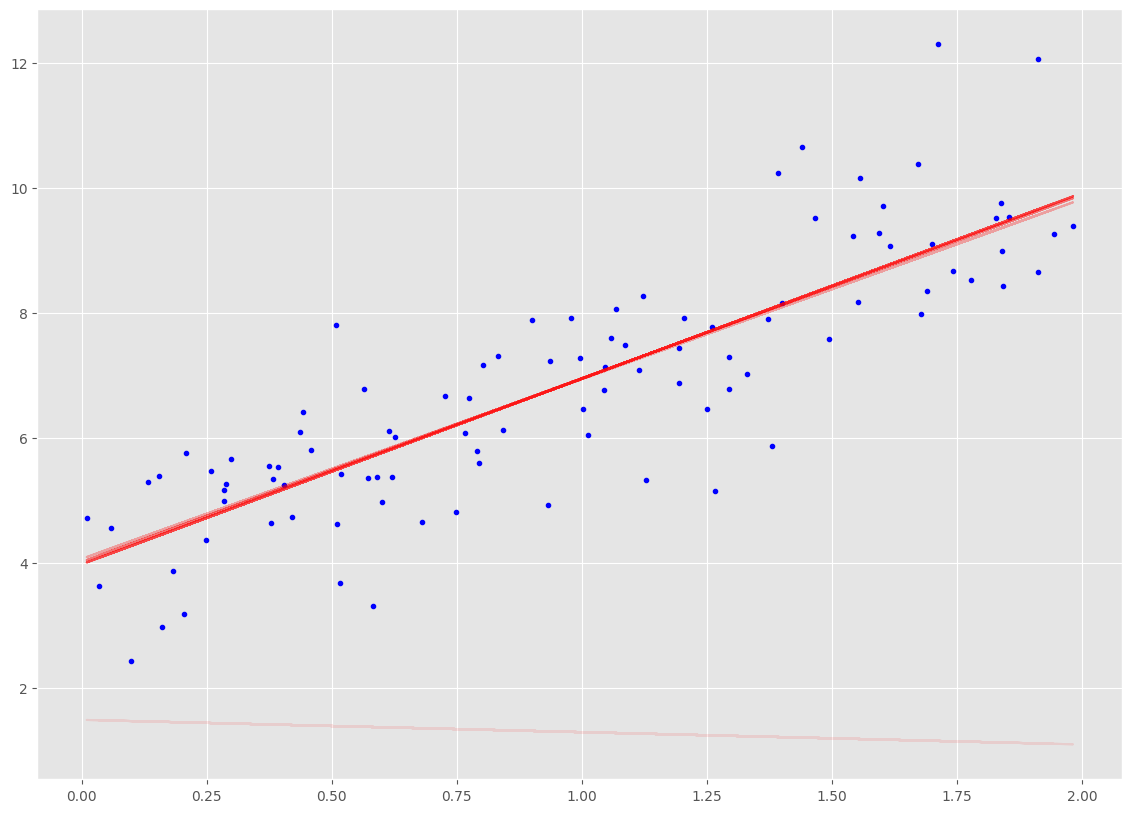

In [15]:
_, ax = plt.subplots(figsize=(14,10))
plot_GD(100, 0.1, ax)

The last left plot from the above bunch of plots is individually plotted here to see how fast the red fitted line reached to the best fit

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $ x_i $ and label $ y_i $:

$$ b = b - \alpha \frac{\partial}{\partial b} J(b; x_i; y_i ) $$

Batch gradient descent performs redundant computations for large datasets, as it recomputes gradients for similar examples before each parameter update. SGD does away with this redundancy by performing one update at a time. It is therefore usually much faster and can also be used to learn online.

While batch gradient descent converges to the minimum of the basin the parameters are placed in, SGD's fluctuation, on the one hand, enables it to jump to new and potentially better local minima. On the other hand, this ultimately complicates convergence to the exact minimum, as SGD will keep overshooting. However, it has been shown that when we slowly decrease the learning rate, SGD shows the same convergence behavior as batch gradient descent, almost certainly converging to a local or the global minimum for non-convex and convex optimization respectively.

Feel free to change some parameters and see what happens.

In [16]:
def stochastic_gradient_descent(X, y, b, learning_rate=0.01, iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of y
    b    = Vector of parameters np.random.randn(j,1)
    learning_rate 
    iterations = # of iterations
    
    Returns the final b vector and array of cost history over # of iterations
    '''
    n = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost = 0.0
        for i in range(n):
            rand_ind = np.random.randint(0, n)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, b)

            b = b - (1/1) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(b, X_i, y_i)
        cost_history[it]  = cost/n
        
    return b, cost_history

In [17]:
lr = 0.01
n_iter = 2000

b = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)), X]
b, cost_history = stochastic_gradient_descent(X_b, y, b, lr, n_iter)


print('b_0:             {:0.3f},\nb_1:             {:0.3f}'.format(b[0][0],b[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

b_0:             3.940,
b_1:             3.109
Final cost/MSE:  0.534


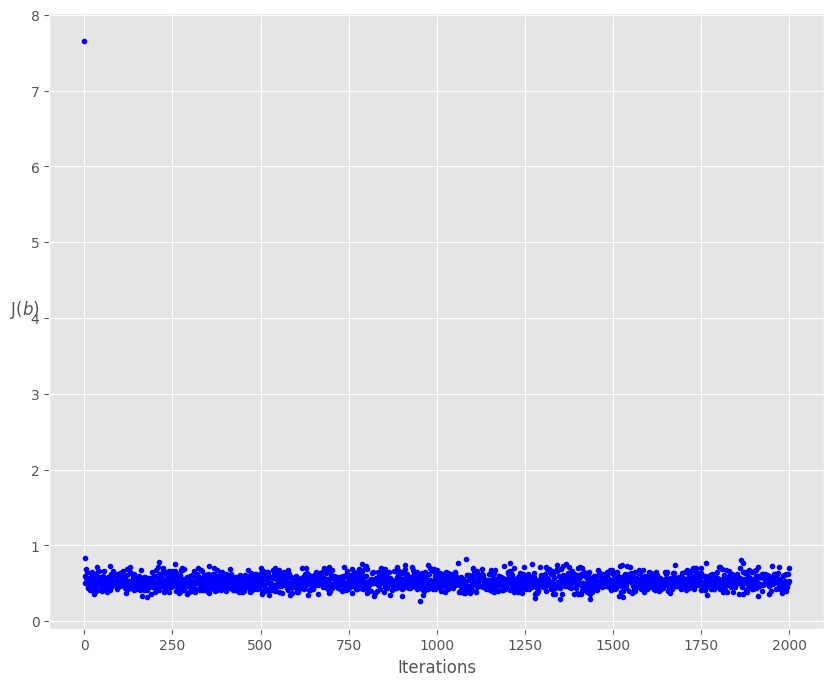

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('J$(b)$', rotation=0)
ax.set_xlabel('Iterations')
b = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.');

The above plot depict the cost function J(b) as the vertical axis which ranges between 0 and 8 and iteration as horizontal axis ranging between 0 and 2000. There are a bunch of blue dots wich starts at iteration = 0 and J(b) =7.7 as a single point and the rest of the blue dots fluctuate around J(b)= 0.5 

## Mini Batch Gradient Descent

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of 
$ m $ training examples.

$$ b = b - \alpha \frac{\partial}{\partial b} J(b; x_{(i:i+m)}; y_{(i:i+m)} ) $$

This way, it a) reduces the variance of the parameter updates, which can lead to more stable convergence; and b) can make use of highly optimized matrix optimizations common to state-of-the-art deep learning libraries that make computing the gradient with respect to a mini-batch very efficient. Common mini-batch sizes range between 50 and 256, but can vary for different applications. Mini-batch gradient descent is typically the algorithm of choice when training a neural network and the term SGD usually is employed also when mini-batches are used. 

In [19]:
def minibatch_gradient_descent(X, y, b, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of y
    b    = Vector of parameters np.random.randn(j,1)
    learning_rate 
    iterations = # of iterations
    
    Returns the final b vector and array of cost history over # of iterations
    '''
    n = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(n)
        X = X[indices]
        y = y[indices]
        for ind, i in enumerate(range(0, n, batch_size)):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i, b)

            b = b - (1/batch_size) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(b, X_i, y_i)
        cost_history[it]  = cost/(ind+1)     # cost/number of batches
        
    return b, cost_history

In [20]:
lr = 0.01
n_iter = 2000

b = np.random.randn(2,1)


b, cost_history = minibatch_gradient_descent(X, y, b, lr, n_iter, batch_size=20)


print('b_0:             {:0.3f},\nb_1:             {:0.3f}'.format(b[0][0],b[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

b_0:             3.892,
b_1:             3.047
Final cost/MSE:  0.550


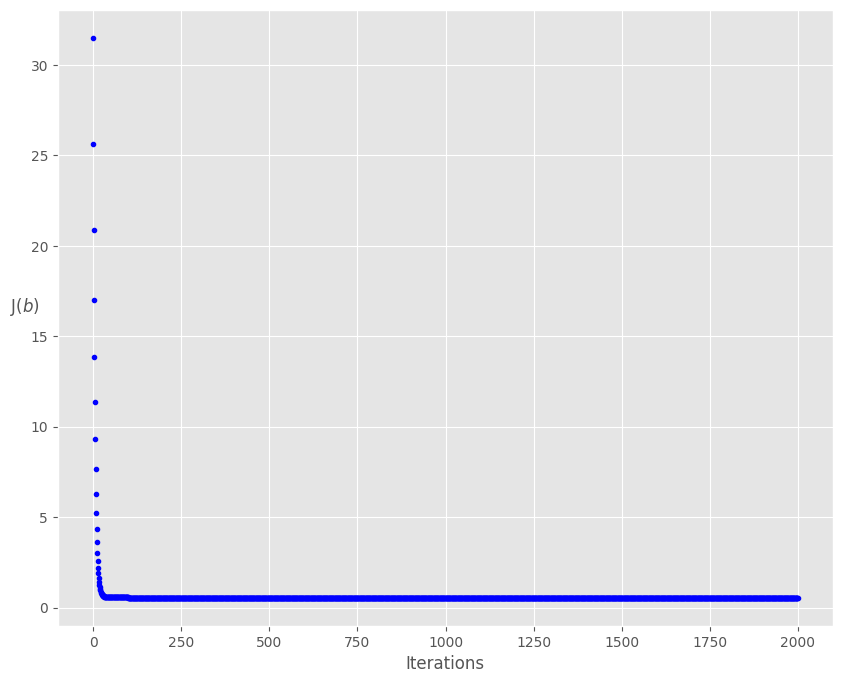

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('J$(b)$', rotation=0)
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.');

The above plot depict the cost function J(b) as the vertical axis which ranges between 0 and 35 and iteration as horizontal axisranging between 0 and 2000. There are a bunch of blue dots wich starts at iteration = 0 and J(b) = 35 and drops step by step to J(b) equal to 26, 22, 17.5, 14, 12, ... till it finally shows an elbow at J(b) smaller than one at and iteration about 35